In [11]:
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the FASTQ file
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")

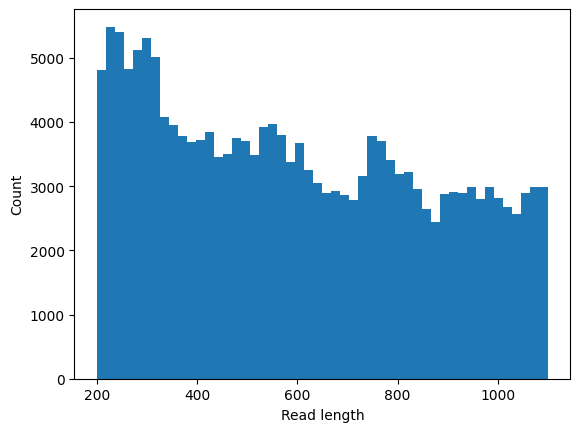

In [13]:
# Plot a histogram of read lengths
read_lengths = [len(rec) for rec in records]
plt.hist(read_lengths, bins=50)
plt.xlabel("Read length")
plt.ylabel("Count")
plt.show()

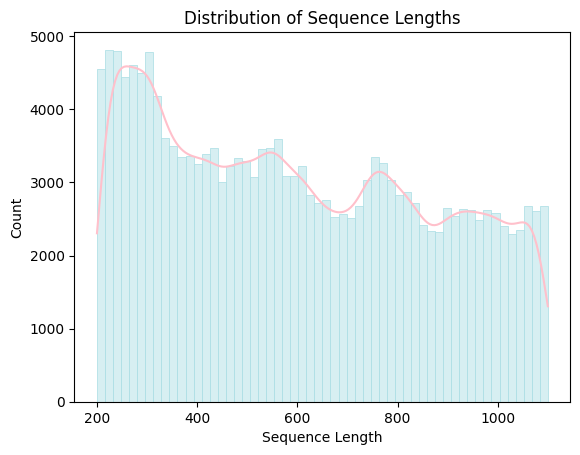

In [41]:
ax = sns.histplot(read_lengths, kde=True, color="powderblue", edgecolor="powderblue")
ax.lines[0].set_color('pink')
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

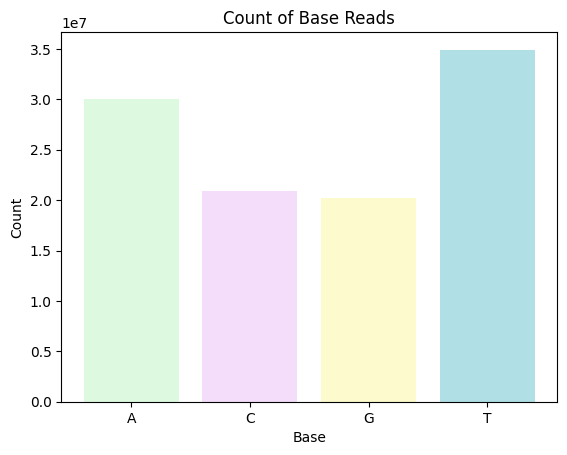

In [37]:
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")
counts = {"A": 0, "C": 0, "G": 0, "T": 0}
for record in records:
    for base in record.seq:
        if base.upper() in counts:
            counts[base.upper()] += 1
plt.bar(counts.keys(), counts.values(), color=['#DDFAE0', '#F4DDFA', '#FDFACD', 'powderblue'])
plt.xlabel("Base")
plt.ylabel("Count")
plt.title("Count of Base Reads")
plt.show()

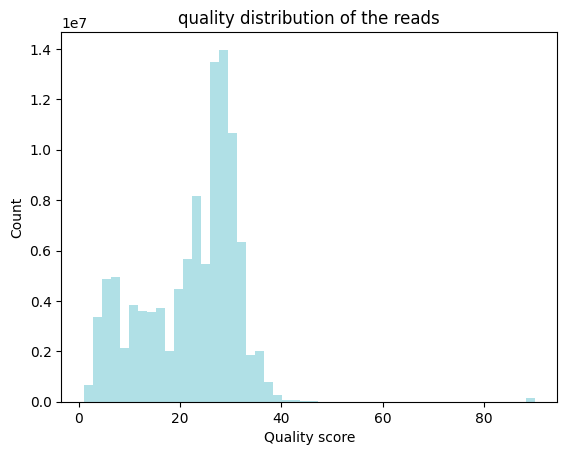

In [43]:
# Calculate and plot the quality distribution of the reads
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")
qualities = []
for record in records:
    for quality in record.letter_annotations["phred_quality"]:
        qualities.append(quality)
plt.hist(qualities, bins=50, color="powderblue")
plt.xlabel("Quality score")
plt.ylabel("Count")
plt.title("quality distribution of the reads")
plt.show()

In this example, we first specify the input file path and format (in this case, a FASTQ file), and then use a for loop to iterate over each read and extract the quality scores as a list of arrays. We then convert the list of quality scores into a numpy array and use the np.mean() function to calculate the mean quality score for each position in the reads. Finally, we plot the mean quality scores using matplotlib.pyplot functions, with a blue line representing the mean quality score at each position and a blue shaded region representing the standard deviation of the mean.

Note that the colors used in this example can be changed to any other colors by specifying the appropriate values for the color parameter in the plt.plot() and plt.fill_between() functions.

In [10]:
import matplotlib.cm as cm
# Read in FASTQ file
fastq_file = "SRR17066006.fastq"

# iterate over each read and extract the quality scores
quality_scores = []
for record in SeqIO.parse(fastq_file, "fastq"):
    quality_scores.append(record.letter_annotations["phred_quality"])

# convert the list of quality scores into a numpy array for easy analysis
quality_scores = np.array(quality_scores)

# calculate the mean quality score for each position in the reads
mean_quality = np.mean(quality_scores, axis=0)

# plot the mean quality scores with colors to distinguish different positions
plt.plot(mean_quality, color='blue')
plt.fill_between(range(len(mean_quality)), mean_quality, 0, color='blue', alpha=0.1)
plt.xlabel("Position in read")
plt.ylabel("Mean quality score")
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (176406,) + inhomogeneous part.